In [232]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests

from datetime import datetime, timedelta
from dotenv import load_dotenv
import os

In [233]:
load_dotenv()

True

In [234]:
FORECAST_ENDPOINT = os.getenv("FORECAST_ENDPOINT")

In [236]:
def get_weekly_forecast():
    response = requests.get(FORECAST_ENDPOINT)
    return response.json()

In [237]:
json = get_weekly_forecast()

In [82]:
week_metadata = json['forecast']['forecastday']

In [229]:
def plot(x, y, date, title, xlabel, ylabel, above_threshold=None):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label='Pressure')

    if above_threshold is not None:
        plt.scatter(x[above_threshold], y[above_threshold], color='red', zorder=5, label='Significant difference')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [230]:
def plot_weekly_pressure_trend(significant_diff_hour_range = 4, significant_diff_threshold = 3):
    for day_metadata in week_metadata:
        date = day_metadata['date']
        day_pressure_mb = [{'time': hour['time'], 'pressure_mb': hour['pressure_mb']} for hour in day_metadata['hour']]
        df = pd.DataFrame(day_pressure_mb)
        df['time'] = pd.to_datetime(df['time'])
        df['above_threshold'] = df['pressure_mb'].diff(periods=significant_diff_hour_range) >= significant_diff_threshold
        plot(df['time'], df['pressure_mb'], date, f"Atmospheric Pressure Trend ({date})", "Time", "Pressure (hPa)", df['above_threshold'])

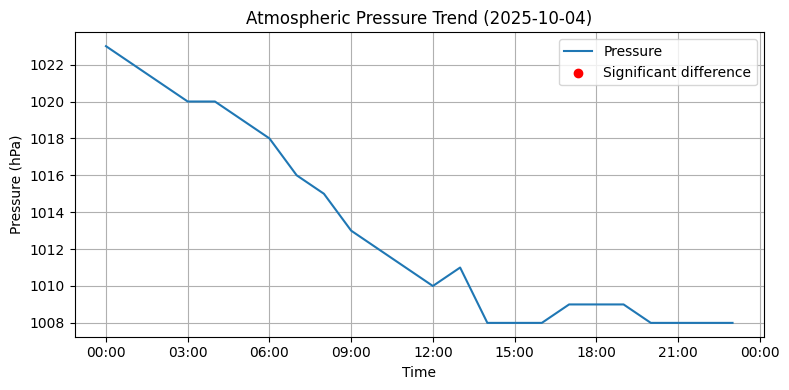

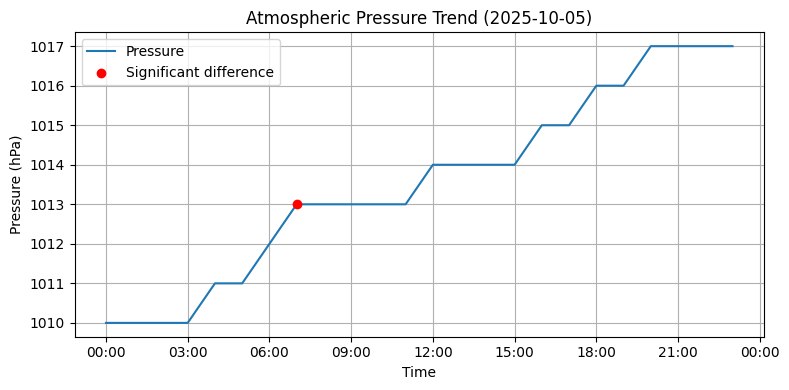

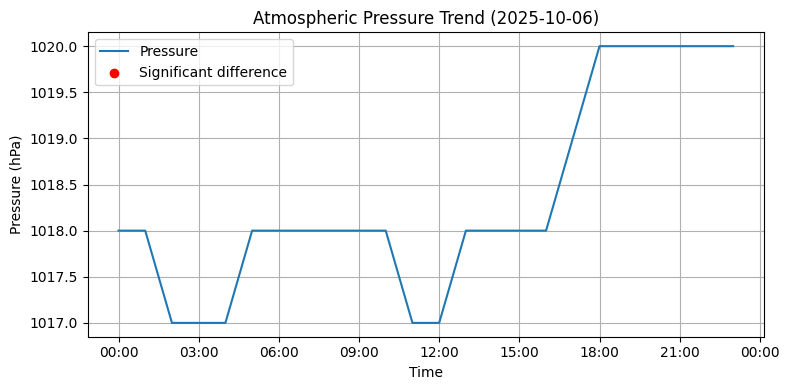

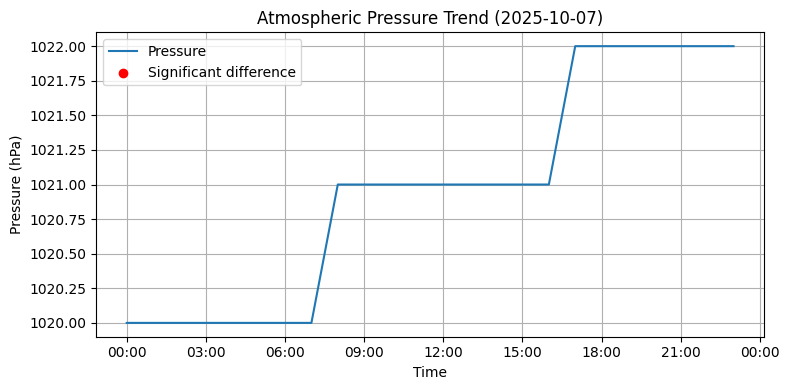

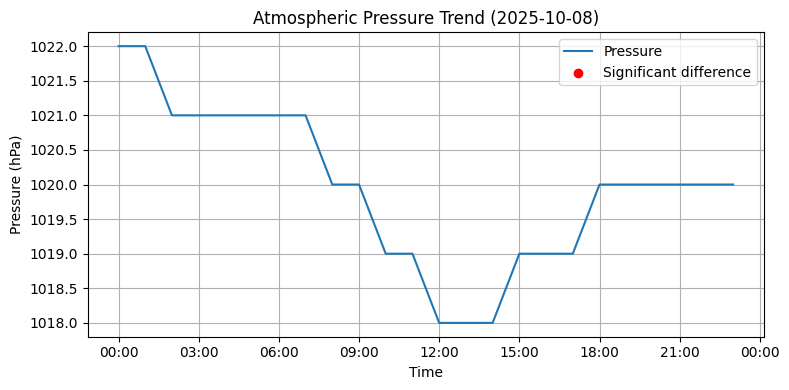

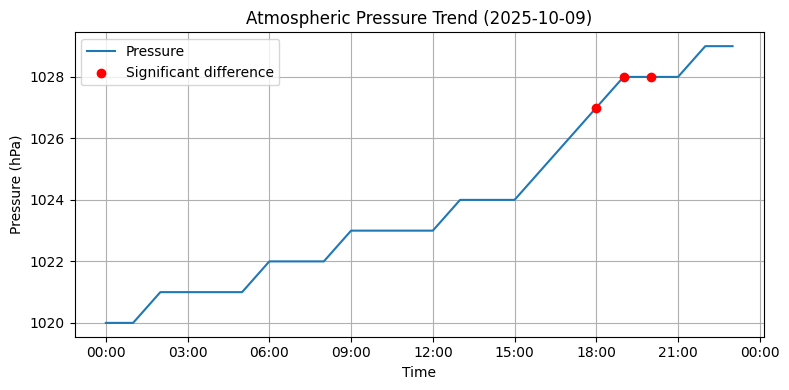

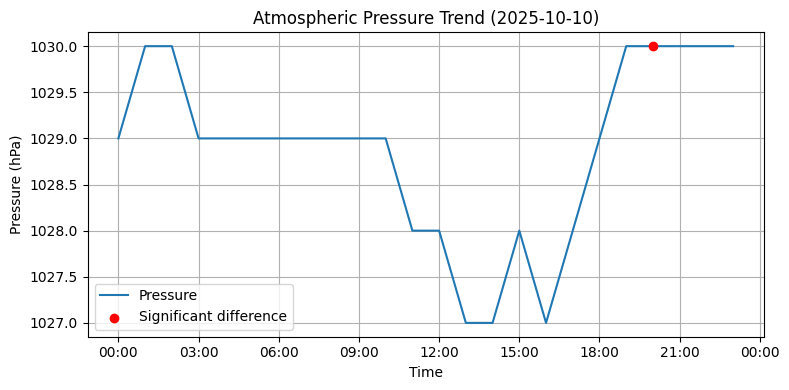

In [231]:
plot_weekly_pressure_trend()